In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import json
import twitter

In [2]:
df_all = pd.read_csv('dataset/all_ep.csv')
df_all.head()

,source,target,weight
0,1000117892640329730,2195550221,1
1,1001093201330163713,1241307294148825093,4
2,1001093201330163713,1242948664110321664,1
3,1001093201330163713,197853971,1
4,1001093201330163713,2185194511,1


In [3]:
Gmentions_all = nx.DiGraph()
for _, edge in df_all.iterrows():
    Gmentions_all.add_edge(str(edge['source']), str(edge['target']), weight=edge['weight'])

# Preprocessing

Rimuovo i cappi dalla rete ottenuta

In [4]:
Gmentions_all.remove_edges_from(nx.selfloop_edges(Gmentions_all))

# Network Info

In [5]:
print("Number of nodes {}".format(Gmentions_all.order()))
print("Number of edges {}".format(Gmentions_all.size()))

Number of nodes 5208
Number of edges 16520


In [6]:
density = nx.density(Gmentions_all)
print("Density {}".format(density))

Density 0.0006091882102463392


## Degree Analysis

In [7]:
degree = list(dict(Gmentions_all.degree(weight='weight')).values())

In [8]:
print('DEGREE')
print('Mean degree: {}'.format(np.mean(degree)))
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

DEGREE
Mean degree: 16.41321044546851
Standard deviation: 176.56805538335334
Median: 2.0
Min: 0
Max: 9560


In [9]:
in_degree = list(dict(Gmentions_all.in_degree(weight='weight')).values())

In [10]:
print('IN_DEGREE')
print('Mean degree: {}'.format(np.mean(in_degree)))
print('Standard deviation: {}'.format(np.std(in_degree)))
print('Median: {}'.format(np.median(in_degree)))
print('Min: {}'.format(np.min(in_degree)))
print('Max: {}'.format(np.max(in_degree)))

IN_DEGREE
Mean degree: 8.206605222734256
Standard deviation: 172.78208735454987
Median: 0.0
Min: 0
Max: 9535


In [11]:
out_degree = list(dict(Gmentions_all.out_degree(weight='weight')).values())

In [12]:
print('OUT_DEGREE')
print('Mean degree: {}'.format(np.mean(out_degree)))
print('Standard deviation: {}'.format(np.std(out_degree)))
print('Median: {}'.format(np.median(out_degree)))
print('Min: {}'.format(np.min(out_degree)))
print('Max: {}'.format(np.max(out_degree)))

OUT_DEGREE
Mean degree: 8.206605222734256
Standard deviation: 28.618939879245925
Median: 2.0
Min: 0
Max: 861


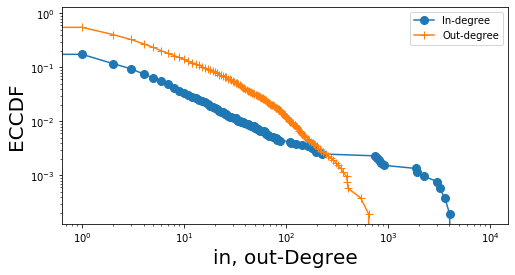

In [13]:
cdf = ECDF(in_degree)
x = np.unique(in_degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8,label='In-degree')
cdf = ECDF(out_degree)
x = np.unique(out_degree)
y = cdf(x)
axes.loglog(x,1-y,marker='+',ms=8,label='Out-degree')
axes.set_xlabel('in, out-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
axes.legend()

In [14]:
p = density
random_graph = nx.fast_gnp_random_graph(Gmentions_all.order(),p,directed=True)

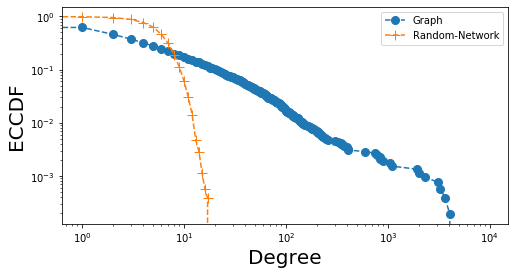

In [15]:
random_degree = list(dict(random_graph.degree()).values())
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--',label='Graph')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--',label='Random-Network')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
axes.legend()

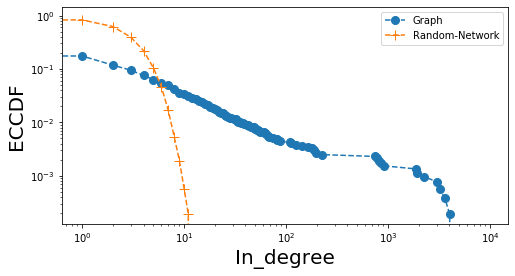

In [16]:
random_in_degree = list(dict(random_graph.in_degree()).values())

cdf = ECDF(in_degree)
x = np.unique(in_degree)
y = cdf(x)

cdf_random = ECDF(random_in_degree)
x_random = np.unique(random_in_degree)
y_random = cdf_random(x_random)

fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--',label='Graph')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--',label='Random-Network')
axes.set_xlabel('In_degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
axes.legend()

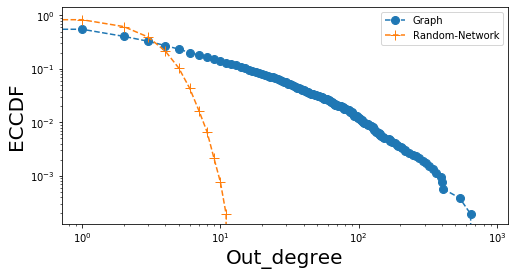

In [17]:
random_out_degree = list(dict(random_graph.out_degree()).values())
cdf = ECDF(out_degree)
x = np.unique(out_degree)
y = cdf(x)

cdf_random = ECDF(random_out_degree)
x_random = np.unique(random_out_degree)
y_random = cdf_random(x_random)

fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--',label='Graph')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--',label='Random-Network')
axes.set_xlabel('Out_degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
axes.legend()

## Connectivity

In [18]:
num_weakly_cc = nx.number_weakly_connected_components(Gmentions_all)
num_strong_cc = nx.number_strongly_connected_components(Gmentions_all)
print("Strongly connected components: {}".format(num_strong_cc))
print("Weakly connected components: {}".format(num_weakly_cc))

Strongly connected components: 4449
Weakly connected components: 42


In [19]:
weakly_cc = list(nx.weakly_connected_components(Gmentions_all))
len_cc = [len(wcc) for wcc in weakly_cc]
counts = pd.Series(len_cc).value_counts().sort_index()

Text(0, 0.5, 'Count')

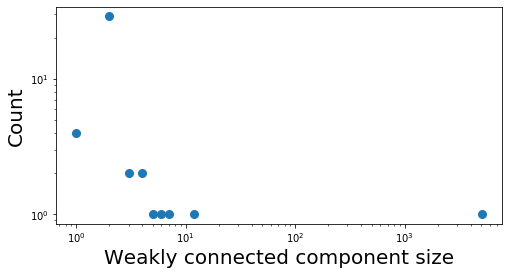

In [20]:
fig_gc = plt.figure(figsize=(8,4))
axes = fig_gc.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(counts.index,counts.values,marker='o',ms=8, linestyle='None')
axes.set_xlabel('Weakly connected component size',size=20)
axes.set_ylabel('Count', size = 20)

In [21]:
gc = sorted(nx.connected_components(Gmentions_all.to_undirected()))[0]
Ggc = Gmentions_all.subgraph(gc).to_undirected()
d = nx.diameter(Ggc)
print('Giant component diameter: {}'.format(d))

Giant component diameter: 8


## Transitivity

In [22]:
global_clustering_coeff = nx.transitivity(Gmentions_all.to_undirected())
avg_local_clustering_coeff = nx.average_clustering(Gmentions_all.to_undirected())
avg_local_clustering_coeff0 = nx.average_clustering(Gmentions_all.to_undirected(),\
                                                   count_zeros=False)

In [23]:
print('global clustering coeff: {}'.format(global_clustering_coeff))
print('avg local clustering coeff: {}'.format(avg_local_clustering_coeff))
print('avg local clustering coeff >0 : {}'\
      .format(avg_local_clustering_coeff0))

global clustering coeff: 0.013882374165614289
avg local clustering coeff: 0.32671754666310765
avg local clustering coeff >0 : 0.6649257456121395


## Reciprocity

In [24]:
print('Reciprocity: {}'.format(nx.overall_reciprocity(Gmentions_all)))

Reciprocity: 0.03656174334140436


Very low reciprocity is typical of an information network.

# Centrality

In [25]:
influencers_id = [(str(k),v) for k,v in dict(Gmentions_all.in_degree(weight='weight')).items()\
                  if v>=np.percentile(in_degree,99.9)]

In [26]:
twitter_keys = json.load(open('info/application_keys.json'))['twitter']
consumer_key = twitter_keys['API_key']
consumer_secret = twitter_keys['API_secret']
bearer_token = twitter.oauth2_dance(consumer_key=consumer_key,consumer_secret=consumer_secret)
twitter_api = twitter.Twitter(auth=twitter.OAuth2(bearer_token=bearer_token))

In [27]:
in_deg_cen = nx.in_degree_centrality(Gmentions_all)
out_deg_cen =  nx.out_degree_centrality(Gmentions_all)
pr_centrality = nx.pagerank_scipy(Gmentions_all,weight='weight',alpha=.85)

In [28]:
influencers_username_centrality = [(twitter_api.users.show(user_id=k)['screen_name'],v,\
                                    in_deg_cen[k],\
                                    Gmentions_all.out_degree(weight='weight')[k],\
                                    out_deg_cen[k],\
                                    pr_centrality[k])\
                                for (k,v) in influencers_id]

In [29]:
influencers_table = pd.DataFrame(influencers_username_centrality,\
                                 columns=['user','in_degree','in_degree_centrality','out_degree',\
                                         'out_degree_centrality','pagerank',])
influencers_table.set_index('user',inplace=True)
influencers_table.sort_values(by='in_degree_centrality',inplace=True,ascending=False)
influencers_table

,in_degree,in_degree_centrality,out_degree,out_degree_centrality,pagerank
user,,,,,
StevenWMoffat,9535,0.400038,25,0.001152,0.179896
Emily_Rosina,3209,0.219896,62,0.005569,0.041221
russelldavies63,3600,0.205301,31,0.001344,0.110193
SophiaMyles,3031,0.198963,30,0.003841,0.059488
mrpeterharness,4022,0.120223,17,0.000960,0.029042
ShearmanRobert,2271,0.116766,17,0.002497,0.028079


Most of the influencers are the writers or showrunners of the episodes whose data I collected.
SophiaMyles is the protagonist of "The Girl in the fireplace"(DW 2x04).
User Emily_Rosina is not a member of the cast/crew or but is an influencer as a journalist of the DW Magazine and organizer of the project.

In [30]:
espansivi_id = [(k,v) for k,v in dict(Gmentions_all.out_degree(weight='weight')).items()\
                if v>=np.percentile(out_degree,99.9)]

In [31]:
espansivi_username = [(twitter_api.users.show(user_id=k)['screen_name'],v) for (k,v) in espansivi_id]

In [32]:
espansivi_df = pd.DataFrame(espansivi_username,columns=['user','out_degree'])
espansivi_df.set_index('user',inplace=True)
espansivi_df.sort_values(by='out_degree',ascending=False)

,out_degree
user,
BlogtorWho,861
DrWho247,646
DoctorWhoPN,538
TomFrosttt,405
AH96DWfan,398
Wishing4aTARDIS,393


Authority users are monothematic account or fan-made news account. They try to expand as much as possible in the network to get new followers.

In [33]:
print("pearson(in_deg,out_deg): {}"\
      .format(scipy.stats.pearsonr(list(in_deg_cen.values()),list(out_deg_cen.values()))[0]))
print('pearson(in_deg,pagerank): {}'\
      .format(scipy.stats.pearsonr(list(in_deg_cen.values()),list(pr_centrality.values()))[0]))
print('pearson(out_deg,pagerank): {}'\
      .format(scipy.stats.pearsonr(list(out_deg_cen.values()),list(pr_centrality.values()))[0]))

pearson(in_deg,out_deg): 0.0918939727001928
pearson(in_deg,pagerank): 0.937987313028115
pearson(out_deg,pagerank): 0.05345293501648904


There is no correlation between in/out degree.

In [34]:
set_influencer = {username for username,_ in influencers_id}

In [35]:
with open('info/analysis_utility.json','r') as rf:
    info = json.load(rf)
    info['influencers'] = repr(list(set_influencer))
    dw_member = eval(info['dw_member'])

In [36]:
with open('info/analysis_utility.json','w') as wf:
    json.dump(info,wf)

### Interactions between cast/crew members

We extract the indirect dw_member subnet. I expect dense and high transitivity network.

In [37]:
dw_member_tuples = [(name,twitter_api.users.show(screen_name=name)['id_str']) for name in dw_member]
dw_member_ids = [id_ for x,id_ in dw_member_tuples]

In [38]:
Gcast = Gmentions_all.to_undirected().subgraph(dw_member_ids)
Gcast_mod = Gcast.copy()
for node in dw_member_tuples:
    Gcast_mod.add_node(node[1],username=node[0])
Gcast_mod.remove_edges_from(nx.selfloop_edges(Gcast_mod))

In [39]:
labels = nx.get_node_attributes(Gcast_mod, 'username') 

/home/manueldileo/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


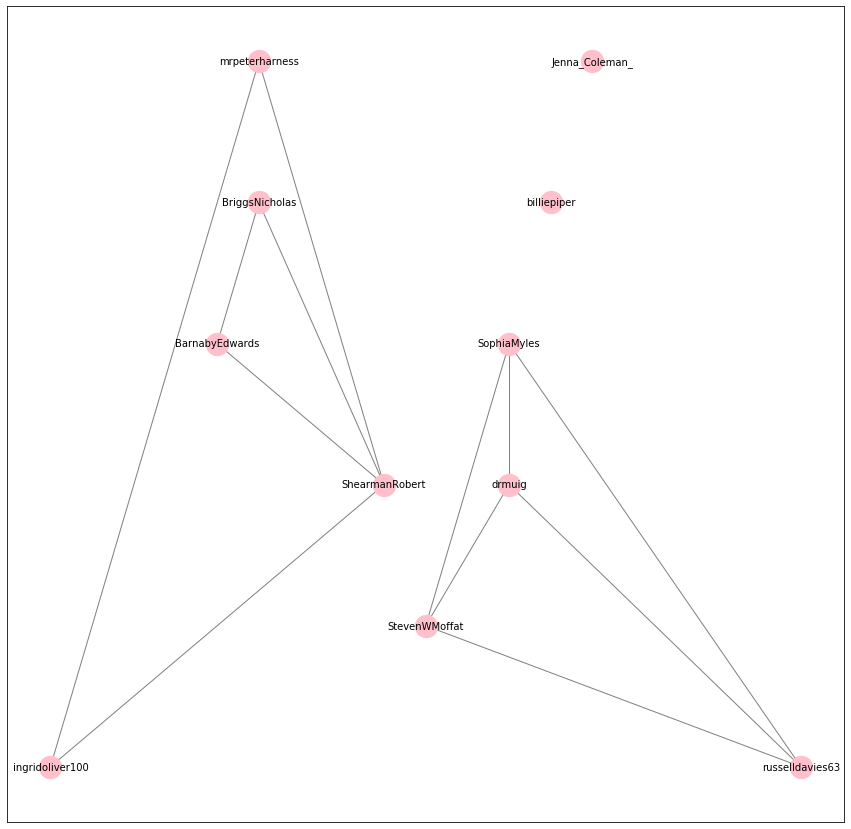

In [40]:
plt.figure(figsize=(15,15))
nx.draw_networkx(Gcast_mod,\
                 pos=nx.drawing.layout.planar_layout(Gcast_mod),\
                 labels=labels,node_size=500,font_size=10,font_color='black',node_color='pink',edge_color='grey')

In [41]:
print('Transitivity: {}'.format(nx.transitivity(Gcast_mod)))

Transitivity: 0.8181818181818182


In [42]:
print('Density: {}'.format(nx.density(Gcast_mod)))

Density: 0.21818181818181817


In [43]:
ccs = sorted(nx.connected_components(Gcast_mod), key=len, reverse=True)
for i,cc in enumerate(ccs[:2]):
    G0 = Gcast_mod.subgraph(cc)
    print("Transitivity cc {}: {}".format([u for u in nx.get_node_attributes(G0,'username').values()],\
                                          nx.transitivity(G0)))
    print('Density cc {}: {}'.format([u for u in nx.get_node_attributes(G0,'username').values()],\
                                          nx.density(G0)))
    print()

Transitivity cc ['ingridoliver100', 'BarnabyEdwards', 'mrpeterharness', 'BriggsNicholas', 'ShearmanRobert']: 0.6
Density cc ['ingridoliver100', 'BarnabyEdwards', 'mrpeterharness', 'BriggsNicholas', 'ShearmanRobert']: 0.6

Transitivity cc ['russelldavies63', 'SophiaMyles', 'StevenWMoffat', 'drmuig']: 1.0
Density cc ['russelldavies63', 'SophiaMyles', 'StevenWMoffat', 'drmuig']: 1.0



### Which users attended all the events?

Let's create a new attribute 'event'. Users who have 'event' equals to [1,1,1,1] belong to core set. 

In [44]:
df1x06 = pd.read_csv('dataset/dalek.csv')
df1x06['event'] = [[1,0,0,0] for i in range(0,len(df1x06))]

In [45]:
df2x04 = pd.read_csv('dataset/girl_in_the_fireplace.csv')
df2x04['event'] = [[0,1,0,0] for i in range(0,len(df2x04))]

In [46]:
df9x07 = pd.read_csv('dataset/zygon.csv')
df9x07['event'] = [[0,0,1,0] for i in range(0,len(df9x07))]

In [47]:
df8x04 = pd.read_csv('dataset/listen.csv')
df8x04['event'] = [[0,0,0,1] for i in range(0,len(df8x04))]

In [48]:
df_all_event = df1x06.append(df2x04).append(df9x07).append(df8x04)

In [49]:
def aux_merge_event(x,num_event):
    sub_list = []
    for i in range(0,len(x),num_event):
        sub_list.append(x[i:i+num_event])
        
    res = []
    start = 0
    if sub_list[0][0] == 0:
        start+=1
        res.append(0)
        for j in range(1,len(sub_list[0])):
            if sub_list[0][j] == 1: break
            start+=1
            res.append(0)
            
    for i in range(0,len(sub_list)):
        e = sub_list[i][i+start]
        if e==0: 
            res.append(0)
            for j in range((i+start+1),len(sub_list[i])):
                start+=1
                if sub_list[i][j] == 1: break
                res.append(0)
        res.append(1)
    for i in range(num_event-len(res)):
        res.append(0)
    return res

In [50]:
df_all_event['event'] = df_all_event.groupby(['source','target'])['event'].transform('sum')\
                        .transform(lambda x: aux_merge_event(x,4))
df_all_event['weight'] = df_all_event.groupby(['source','target'])['weight'].transform('sum')
df_all_event.drop_duplicates(subset=['source', 'target'],inplace=True)
df_all_event

,source,target,weight,event
0,1000814363954040832,112125663,1,"[1, 0, 0, 0]"
1,1001093201330163713,1228363893564694528,1,"[1, 0, 0, 0]"
2,1001093201330163713,290179649,4,"[1, 0, 0, 0]"
3,1001093201330163713,291185646,5,"[1, 1, 1, 0]"
4,1001631647400374272,1114612239565303808,1,"[1, 0, 0, 0]"
...,...,...,...,...
3872,998285023567544321,74835605,1,"[0, 0, 0, 1]"
3873,998584475574505473,1241307294148825093,1,"[0, 0, 0, 1]"
3874,999033265,1241307294148825093,1,"[0, 0, 0, 1]"
3876,999880371205357573,19812115,1,"[0, 0, 0, 1]"


In [51]:
G_events = nx.Graph()
for _,item in df_all_event.iterrows():
    
    source = str(item['source'])
    target = str(item['target'])
    weight = item['weight']
    event = item['event']
    
    old_source = True
    old_target = True
    
    if source not in G_events.nodes: 
        old_source=False
        G_events.add_node(source,event=event)
        
    if target not in G_events.nodes: 
        old_target=False
        G_events.add_node(target,event=event)
   
    G_events.add_edge(source,target,weight=weight)
    
    events = nx.get_node_attributes(G_events,'event')
    if old_source:
        new_list = list(np.array(events[source])+np.array(event))
        new_event = list(map(lambda x: 1 if x>0 else 0,new_list))
        G_events.add_node(source,event=new_event)
    if old_target:
        new_list = list(np.array(events[target])+np.array(event))
        new_event = list(map(lambda x: 1 if x>0 else 0,new_list))
        G_events.add_node(target,event=new_event)
G_events.remove_edges_from(nx.selfloop_edges(G_events))

In [52]:
def is_source(uid):
    source1x06 = list(map(lambda x: str(x),df1x06['source'].values))
    source2x04 = list(map(lambda x: str(x),df2x04['source'].values))
    source9x07 = list(map(lambda x: str(x),df9x07['source'].values))
    source8x04 = list(map(lambda x: str(x),df8x04['source'].values))
    
    return uid in source1x06 and uid in source2x04 and uid in source9x07 and uid in source8x04

In [53]:
core = [uid for uid,e in nx.get_node_attributes(G_events,'event').items()\
        if e == [1,1,1,1] and is_source(uid)]

In [54]:
len(core)

161

In [55]:
core_username = [twitter_api.users.show(user_id=core_item)['screen_name'] for core_item in core]

In [56]:
set(core_username).intersection(dw_member)

set()

In [57]:
set(core_username).intersection(set(influencers_table.index))

{'Emily_Rosina'}

In [58]:
set(core_username).intersection(set([x for x,_ in espansivi_username]))

{'AH96DWfan', 'BlogtorWho', 'DoctorWhoPN', 'DrWho247', 'Wishing4aTARDIS'}

## Community Detection

In [59]:
from sklearn.metrics import normalized_mutual_info_score as nmi
import community
from community import community_louvain
from collections import Counter

In [60]:
def create_graph(dataset):
    G = nx.Graph()
    for _,edge in dataset.iterrows():
        source = str(edge['source'])
        target = str(edge['target'])
        G.add_node(source)
        G.add_node(target)
        G.add_edge(source,target,weight=edge['weight'])
    G.remove_edges_from(nx.selfloop_edges(G))
    return G

In [61]:
def extract_partition_core(partition,core):
    partition_core = dict()
    for k,v in partition.items():
        if k in core: partition_core[k] = v
    return partition_core

In [62]:
def partition_sets(partition):
    sets = []
    for i in list(set(partition.values())):
        pset = set()
        for k,v in partition.items():
            if v == i: pset |= {k}
        sets.append(pset)
    return sets

In [63]:
#DENDROGRAM
partitions_core_levels = [[] for l in range(3)]
for ep in [df1x06,df2x04,df8x04,df9x07]:
    Gep = create_graph(ep)
    dendrogram = community.generate_dendrogram(Gep,weight='weight')
    for level in range(len(dendrogram)):
        partition_ep = community.partition_at_level(dendrogram,level)
        partition_core = extract_partition_core(partition_ep,core)
        partitions_core_levels[level].append(partition_core)

for level,partitions_core in enumerate(partitions_core_levels):
    print('Dendrogram level {}:'.format(level))
    for i in range(len(partitions_core)-1):
        values_i = list(partitions_core[i].values())
        values_is = list(partitions_core[i+1].values())
        print("NMI {}, {}: {}".format(i,i+1,\
                nmi(values_i,values_is)))
    print()
    
#LABEL PROPAGATION
partitions_label_propagation = []
for ep in [df1x06,df2x04,df8x04,df9x07]:
    Gep = create_graph(ep)
    partition_ep = dict()
    communities = list(nx.community.label_propagation_communities(Gep))
    for i,v in enumerate(communities):
        for e in v:
            partition_ep[e] = i
    partition_core = extract_partition_core(partition_ep,core)
    partitions_label_propagation.append(partition_core)
print('Label propagation:')   
for i in range(len(partitions_label_propagation)-1):
    values_i = list(partitions_label_propagation[i].values())
    values_is = list(partitions_label_propagation[i+1].values())
    print("NMI {}, {}: {}".format(i,i+1,nmi(values_i,values_is)))

Dendrogram level 0:
NMI 0, 1: 0.33554932167153134
NMI 1, 2: 0.35807000480201917
NMI 2, 3: 0.26974548611963456

Dendrogram level 1:
NMI 0, 1: 0.1594867152834958
NMI 1, 2: 0.1963121205176736
NMI 2, 3: 0.1048310551227035

Dendrogram level 2:
NMI 0, 1: 0.12662687671667475
NMI 1, 2: 0.14737914044855627
NMI 2, 3: 0.08317073244162178

Label propagation:
NMI 0, 1: 0.0
NMI 1, 2: 0.0
NMI 2, 3: 0.40049625382001935


There is no similarity between partitions